# **Need Data Group Proje 2**


**!!! Kodları denemeden önce NetflixOriginals.csv dosyası eklenmeli :)**

**!!!Kodları sıra ile çalıştırınız.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("NetflixOriginals.csv", encoding='ISO-8859-1')

In [3]:
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


# **Soru 1-)Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.**

In [4]:
filtreleme = data.Runtime >= 90 
filtrelidata1 = data[filtreleme].groupby(by="Language").Runtime.count()
filtrelidata1

Language
Dutch                           3
English                       264
English/Akan                    1
English/Arabic                  1
English/Japanese                1
English/Korean                  1
English/Russian                 1
English/Taiwanese/Mandarin      1
English/Ukranian/Russian        1
Filipino                        2
French                         13
German                          5
Hindi                          33
Indonesian                      8
Italian                        12
Japanese                        4
Khmer/English/French            1
Korean                          5
Malay                           1
Marathi                         3
Polish                          3
Portuguese                      9
Spanish                        22
Spanish/Catalan                 1
Spanish/English                 1
Tamil                           1
Thai                            1
Turkish                         5
Name: Runtime, dtype: int64

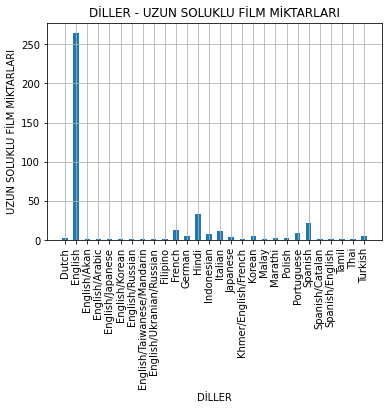

In [5]:
plt.bar(filtrelidata1.index , filtrelidata1 , width=0.5)
plt.title("DİLLER - UZUN SOLUKLU FİLM MİKTARLARI")
plt.xlabel("DİLLER")
plt.ylabel("UZUN SOLUKLU FİLM MİKTARLARI")
plt.xticks(filtrelidata1.index, rotation ='vertical')

plt.grid()
plt.show()

# **Soru 2-) 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.**

In [6]:
from datetime import time

data["Premiere"] = pd.to_datetime(data["Premiere"])
filtre_belgesel = data.Genre =="Documentary"
filtre_tarih = (data['Premiere'] > '2019-01-01') & (data['Premiere'] < '2020-06-30')
filtrelidata =  data[filtre_belgesel & filtre_tarih]
filtrelidata

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish
111,Ghosts of Sugar Land,Documentary,2019-10-16,21,5.5,English
151,One Take,Documentary,2020-06-18,85,5.7,Thai
263,A Tale of Two Kitchens,Documentary,2019-05-22,30,6.3,English/Spanish
286,The Legend of Cocaine Island,Documentary,2019-03-29,87,6.3,English
290,Travis Scott: Look Mom I Can Fly,Documentary,2019-08-28,85,6.3,English
295,Birders,Documentary,2019-09-25,37,6.4,English/Spanish


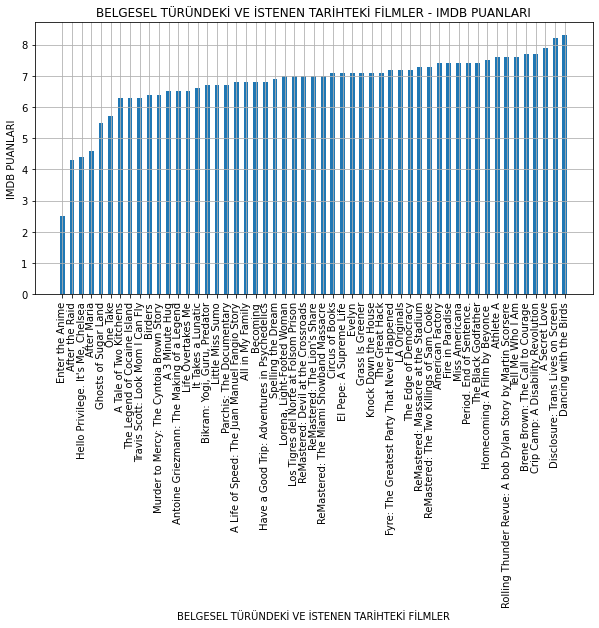

In [7]:
fig = plt.figure(figsize = (10,5))
plt.bar(filtrelidata["Title"] , filtrelidata["IMDB Score"] , width=0.5)
plt.title("BELGESEL TÜRÜNDEKİ VE İSTENEN TARİHTEKİ FİLMLER - IMDB PUANLARI")
plt.xlabel("BELGESEL TÜRÜNDEKİ VE İSTENEN TARİHTEKİ FİLMLER")
plt.ylabel("IMDB PUANLARI")
plt.xticks(filtrelidata["Title"], rotation ='vertical')

plt.grid()
plt.show()

# **Soru-3) İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?**

In [8]:
filtre1 = data.Language == "English" 
filtreli_data = data[filtre1] 
filtreli_data.sort_values(by="IMDB Score", ascending=False).head(1).Genre

583    Documentary
Name: Genre, dtype: object

# **Soru-4)'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir**?

Çözüm 1

In [9]:
data.groupby('Language').Runtime.mean().sort_values(ascending=False)[6]      


115.78787878787878

Çözüm 2

In [10]:
filtre1 = data.Language == "Hindi"

filtreli_data = data[filtre1]
filtreli_data.Runtime.mean() 

115.78787878787878

# **Soru-5 ve 6)'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.**

In [11]:
film_türleri_sayilari = data.Genre.value_counts()

film_türleri_sayilari

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

In [12]:
len(film_türleri_sayilari)

115

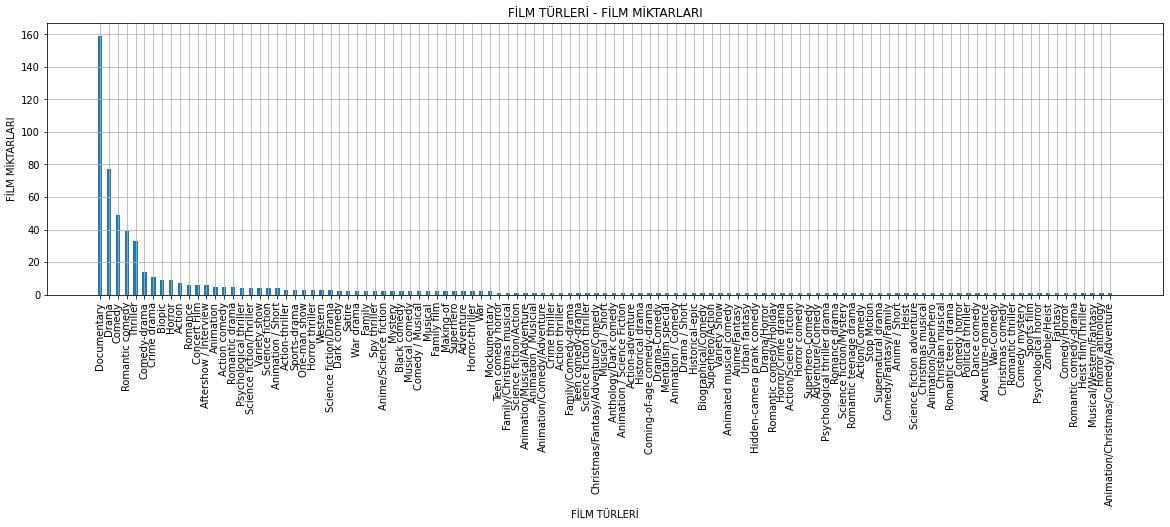

In [13]:
fig = plt.figure(figsize = (20,5))

plt.bar(film_türleri_sayilari.index , film_türleri_sayilari, width=0.5)

plt.xticks(film_türleri_sayilari.index, rotation ='vertical')

plt.title("FİLM TÜRLERİ - FİLM MİKTARLARI")
plt.xlabel("FİLM TÜRLERİ")
plt.ylabel("FİLM MİKTARLARI")
plt.grid()
plt.show()

# **Soru7-)Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.**

In [14]:
en_cok_kullanılan_dil = data.Language.value_counts()
en_cok_kullanılan_dil.head(3)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

# **Soru-8)IMDB puanı en yüksek olan ilk 10 film hangileridir?**


In [15]:
en_yüksek_imdb_score = data.sort_values(by = "IMDB Score", ascending = False, ignore_index=True).head(10)
en_yüksek_imdb_score[['Title','IMDB Score']]

,Title,IMDB Score
0,David Attenborough: A Life on Our Planet,9.0
1,Emicida: AmarElo - It's All For Yesterday,8.6
2,Springsteen on Broadway,8.5
3,Winter on Fire: Ukraine's Fight for Freedom,8.4
4,Taylor Swift: Reputation Stadium Tour,8.4
5,Ben Platt: Live from Radio City Music Hall,8.4
6,Dancing with the Birds,8.3
7,Cuba and the Cameraman,8.3
8,Klaus,8.2
9,13th,8.2


In [16]:
data.groupby("Title")["IMDB Score"].mean().sort_values(ascending=False).head(10)

Title
David Attenborough: A Life on Our Planet       9.0
Emicida: AmarElo - It's All For Yesterday      8.6
Springsteen on Broadway                        8.5
Ben Platt: Live from Radio City Music Hall     8.4
Taylor Swift: Reputation Stadium Tour          8.4
Winter on Fire: Ukraine's Fight for Freedom    8.4
Cuba and the Cameraman                         8.3
Dancing with the Birds                         8.3
The Three Deaths of Marisela Escobedo          8.2
Seaspiracy                                     8.2
Name: IMDB Score, dtype: float64

# **Soru-9)IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.**

In [17]:
data.corr()           

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


Text(0.5, 1.0, 'Kolerasyon Grafiği')

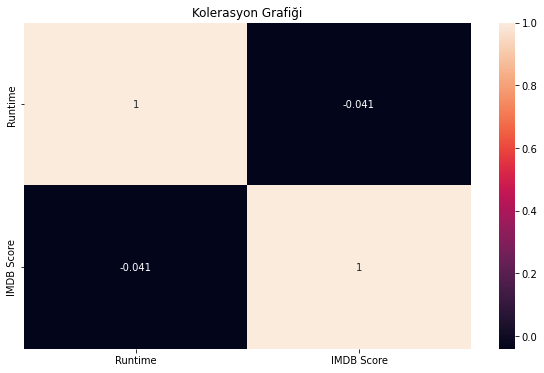

In [18]:
plt.figure(figsize=(10,6))     

sns.heatmap(data.corr(), 
            annot= True)

plt.title('Kolerasyon Grafiği')

# **Soru-10)IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.**

Text(0.5, 1.0, 'En Yüksek IMDB Film Türleri')

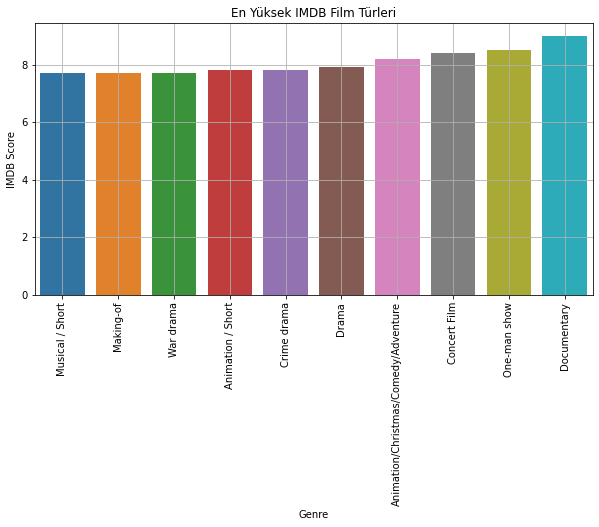

In [19]:
imdb_en_yuksek = data.groupby(data["Genre"])["IMDB Score"].max().sort_values()[-10:].reset_index()

plt.figure(figsize = (10,5))

ax=sns.barplot(x=imdb_en_yuksek["Genre"],y=imdb_en_yuksek["IMDB Score"])

plt.xticks(rotation=90)
plt.grid()

plt.title("En Yüksek IMDB Film Türleri")


# **Soru-11)'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.**

In [20]:
runtime_sıralı_data = data.sort_values(by="Runtime", ascending=False , ignore_index=True).head(10)      
runtime_sıralı_data[['Title','Runtime']]

,Title,Runtime
0,The Irishman,209
1,Da 5 Bloods,155
2,Springsteen on Broadway,153
3,Citation,151
4,The Forest of Love,151
5,Raat Akeli Hai,149
6,The Last Days of American Crime,149
7,Ludo,149
8,Army of the Dead,148
9,Drive,147


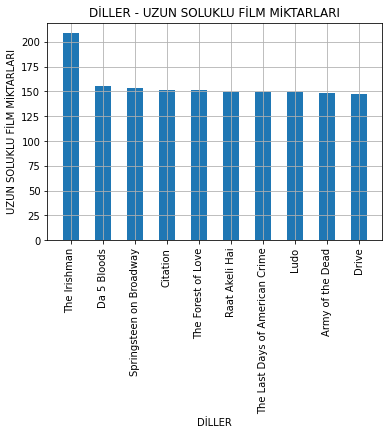

In [21]:
plt.bar(runtime_sıralı_data.Title , runtime_sıralı_data.Runtime , width=0.5)
plt.title("DİLLER - UZUN SOLUKLU FİLM MİKTARLARI")
plt.xlabel("DİLLER")
plt.ylabel("UZUN SOLUKLU FİLM MİKTARLARI")
plt.xticks(runtime_sıralı_data.Title , rotation ='vertical')

plt.grid()
plt.show()

# **Soru-12)Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.**

In [22]:
data["year"]=data.Premiere.dt.year      
yıllar_icin_film_sayıları =  data.year.value_counts() 
yıllar_icin_film_sayıları

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: year, dtype: int64

<function matplotlib.pyplot.pie>

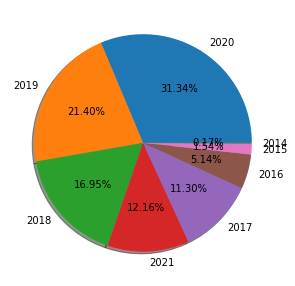

In [23]:
fig = plt.figure(figsize = (10,5))
plt.pie(yıllar_icin_film_sayıları, labels = yıllar_icin_film_sayıları.index, autopct='%1.2f%%', shadow=True)    
plt.pie

# **Soru-13)Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.**

In [24]:
en_az_imdb_ortalamaları = data.groupby(by="Language")["IMDB Score"].mean().sort_values()    
en_az_imdb_ortalamaları.head(1)

Language
Malay    4.2
Name: IMDB Score, dtype: float64

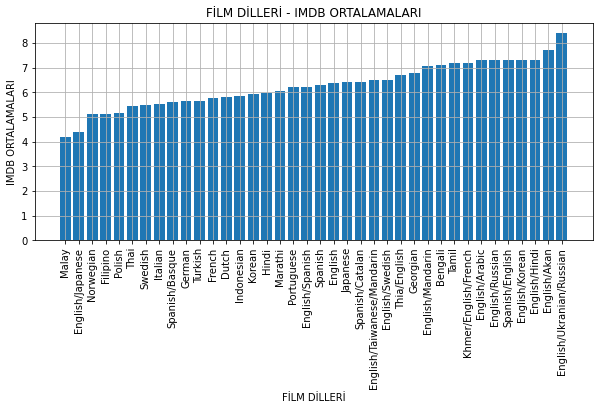

In [25]:
fig = plt.figure(figsize = (10,4))

plt.bar(en_az_imdb_ortalamaları.index , en_az_imdb_ortalamaları, width=0.8)

plt.xticks(en_az_imdb_ortalamaları.index, rotation ='vertical')

plt.title("FİLM DİLLERİ - IMDB ORTALAMALARI")
plt.xlabel("FİLM DİLLERİ")
plt.ylabel("IMDB ORTALAMALARI")
plt.grid()
plt.show()

# **Soru-14)Hangi yılın toplam "runtime" süresi en fazladır?**

In [26]:
en_fazla_runtime = data.groupby(by = "year").Runtime.sum().sort_values(ascending=False)  
en_fazla_runtime

year
2020    17384
2019    10856
2018     9405
2021     7214
2017     6129
2016     2766
2015      814
2014       81
Name: Runtime, dtype: int64

In [27]:
en_fazla_runtime.head(1)

year
2020    17384
Name: Runtime, dtype: int64

# **Soru-15)Her bir dilin en fazla kullanıldığı "Genre" nedir?**

In [28]:
en_fazla_kullanılan_genre = data.groupby(by="Language")["Genre"].describe()
en_fazla_kullanılan_genre

,count,unique,top,freq
Language,,,,
Bengali,1,1,Documentary,1
Dutch,3,3,Romantic comedy,1
English,401,101,Documentary,120
English/Akan,1,1,War drama,1
English/Arabic,1,1,Documentary,1
English/Hindi,2,1,Documentary,2
English/Japanese,2,2,Documentary,1
English/Korean,1,1,Action-adventure,1
English/Mandarin,2,1,Documentary,2


In [ ]:
en_fazla_kullanılan_genre.top

Language
Bengali                                 Documentary
Dutch                               Romantic comedy
English                                 Documentary
English/Akan                              War drama
English/Arabic                          Documentary
English/Hindi                           Documentary
English/Japanese                        Documentary
English/Korean                     Action-adventure
English/Mandarin                        Documentary
English/Russian                         Documentary
English/Spanish                         Documentary
English/Swedish                         Documentary
English/Taiwanese/Mandarin                    Drama
English/Ukranian/Russian                Documentary
Filipino                                      Drama
French                                  Documentary
Georgian                                Documentary
German                                     Thriller
Hindi                                         Drama
Ind

# **Soru-16)Veri setinde outlier veri var mıdır? Açıklayınız.**

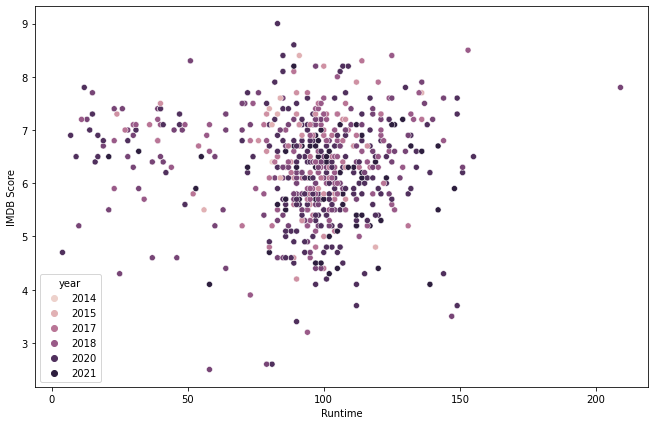

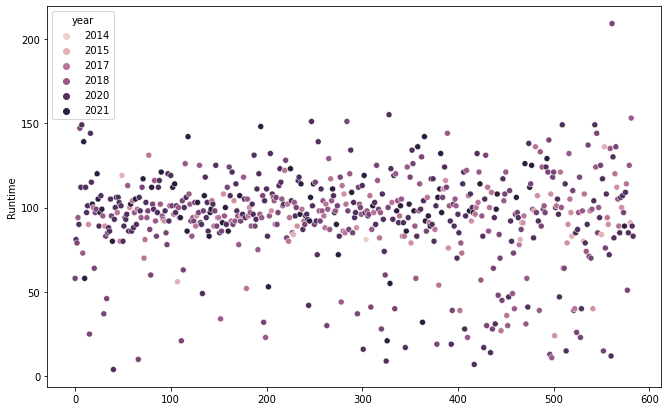

In [29]:
fig = plt.figure(figsize=(11,7))
sns.scatterplot(data=data , x= "Runtime", y = "IMDB Score", hue = "year")     
plt.show()

fig = plt.figure(figsize=(11,7))
sns.scatterplot(data=data , x= data.index , y = "Runtime", hue = "year")
plt.show()


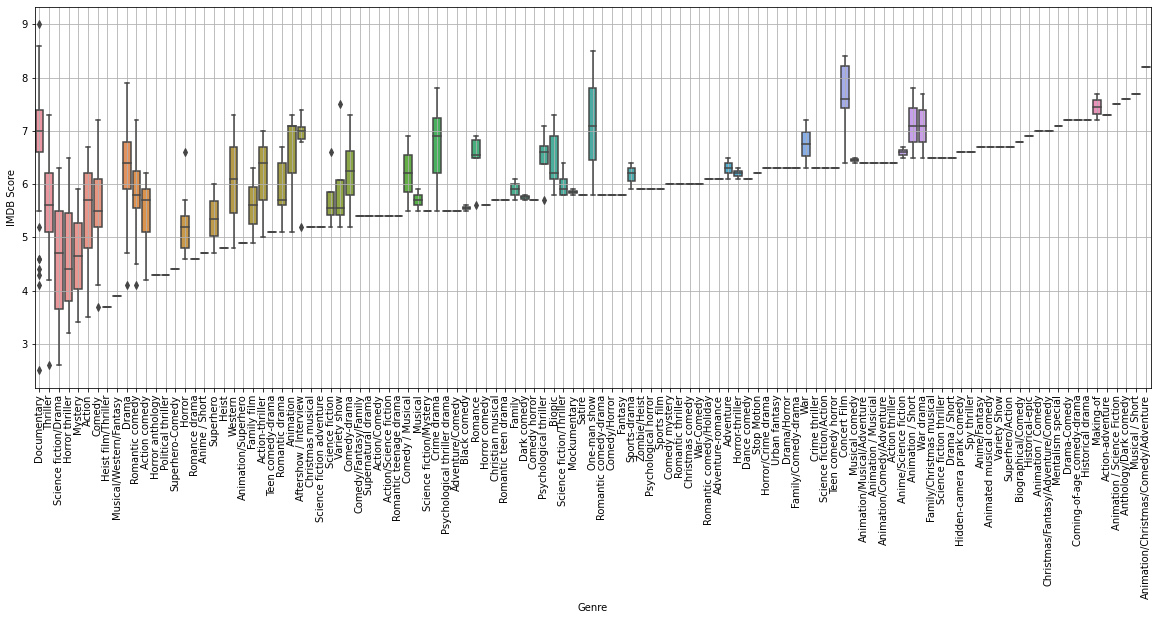

In [30]:
fig = plt.figure(figsize =(20, 7))
 
sns.boxplot( x=data["Genre"], y=data["IMDB Score"] , width=0.8)

plt.xticks(rotation=90)
plt.grid()


Scatterplotlarda ve boxplotta görüldüğü gibi outlierlar vardır.